<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


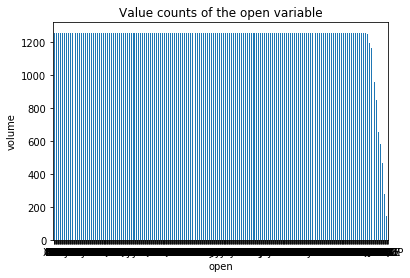

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

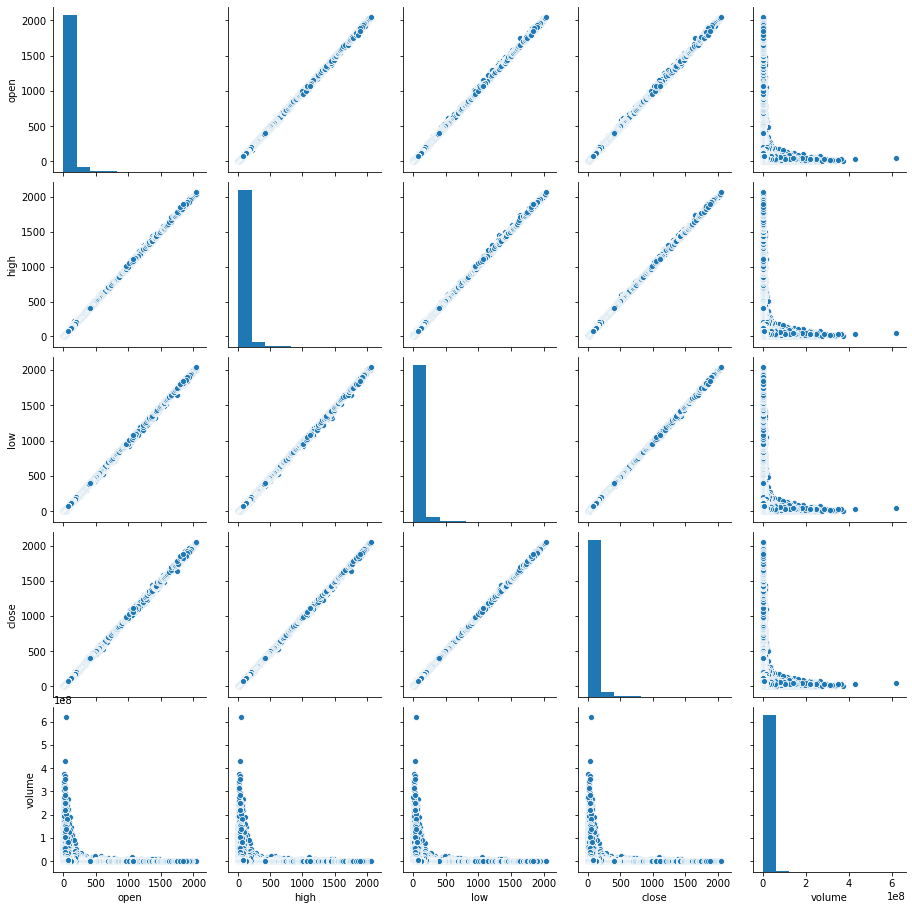

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Thu Oct 13 15:02:24 2022

@author: Brown
"""
import seaborn as sns
import pandas as pd
df = pd.read_csv("./all_stocks_5yr.csv")

df.head()
df.tail()
df.shape
df.describe()
df.info()
df.dtypes
df.isna
df['Name'].value_counts()
df['Name'].value_counts(normalize=True)

import matplotlib.pyplot as plt
df['Name'].value_counts().plot(kind="bar")
plt.title("Value counts of the open variable")
plt.xlabel("open")
plt.xticks(rotation=0)
plt.ylabel("volume")
plt.show()

import seaborn as sns
sns.pairplot(df)
sns.catplot(x="open", y="volume", data=df, kind="box", aspect="1.5")
plt.title("Boxplot for target vs proline")

sns.scatterplot()

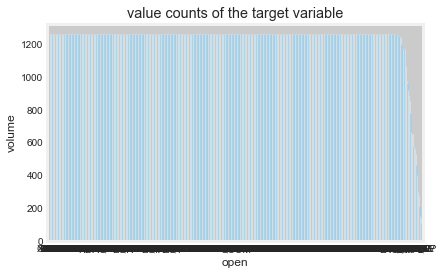

KeyboardInterrupt: 

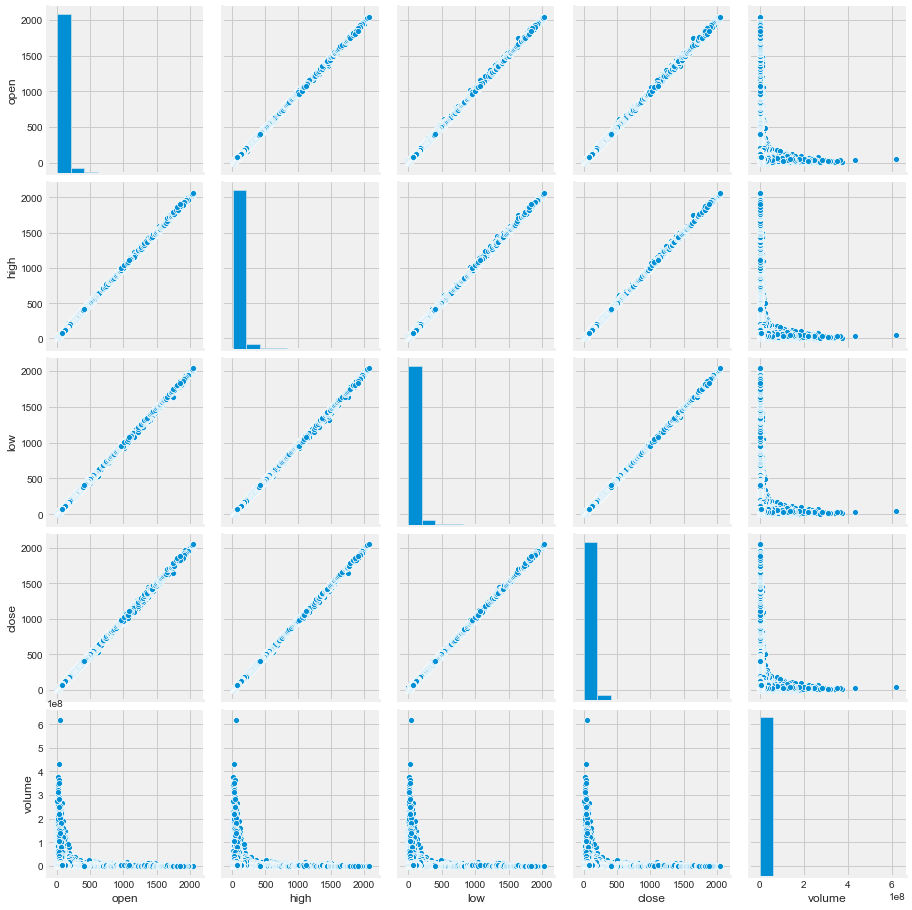

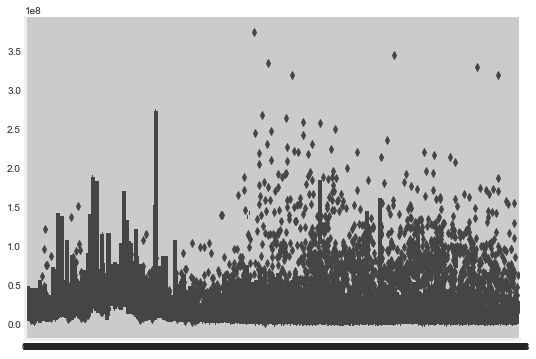

In [12]:
# -*- coding: utf-8 -*-
"""
Created on Thu Oct 13 15:02:24 2022

@author: Brown
"""
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv("./all_stocks_5yr.csv")
df['Name'].value_counts().plot(kind="bar")
plt.title("value counts of the target variable")
plt.xlabel("open")
plt.xticks(rotation=0)
plt.ylabel("volume")
plt.show()

sns.pairplot(df)

sns.catplot(x="open", y="volume", data=df, kind="box",aspect=1.5)
plt.title("Boxplot for open vs volume")
plt.show()

sns.pairplot(df)
sns.catplot(x="open", y="hign", data=df, kind="box",aspect=1.5)
plt.title("Boxplot for open vs hign")
plt.show()

sns.catplot(x="open", y="low", hue="close",
            data=df, palette="Dark2")
plt.title("Relationship between open, low and close")
plt.show()

sns.catplot(x="open", y="low", hue="open",
            data=df, palette="Dark2")
plt.title("Relationship between open and low")
plt.show()

corrmat = df.corr()
hm = sns.heatmap(corrmat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size':6},
                 yticklabels=df.columns,
                 xticklabels=df.columns,
                 cmap="Spectral_r")
plt.show()

In [7]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install yfinance

  Attempting uninstall: requests
    Found existing installation: requests 2.22.0
    Uninstalling requests-2.22.0:
      Successfully uninstalled requests-2.22.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.5.0
    Uninstalling lxml-4.5.0:
      Successfully uninstalled lxml-4.5.0
Note: you may need to restart the kernel to use updated packages.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-11-09 to 2022-11-08
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


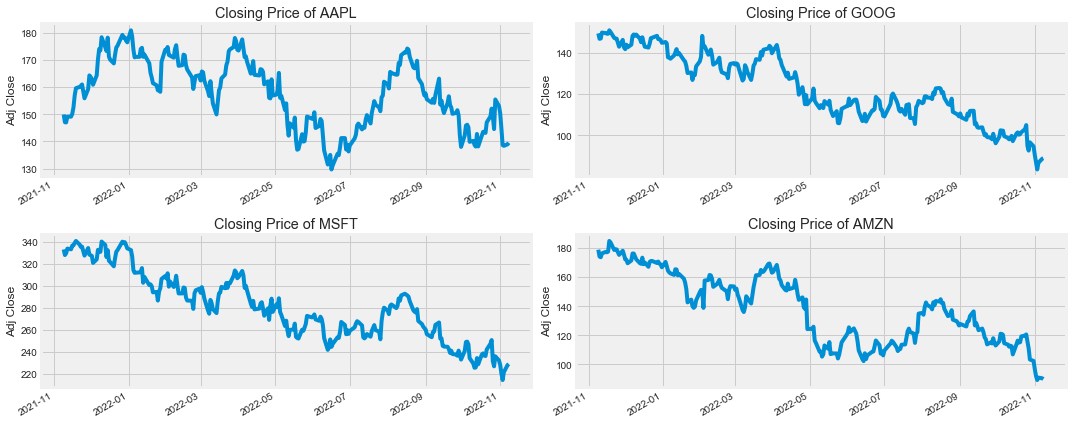

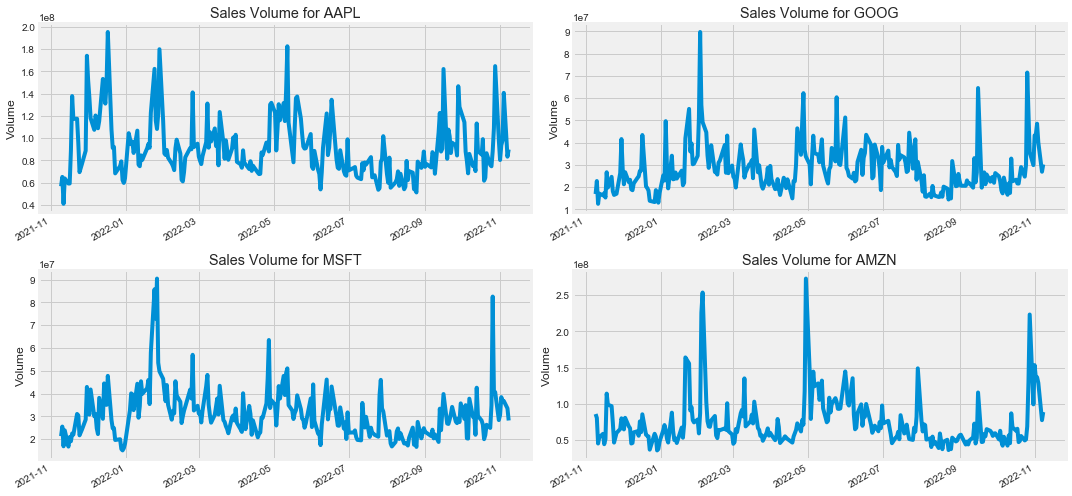

In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

AAPL.describe()

AAPL.info()

plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

In [14]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

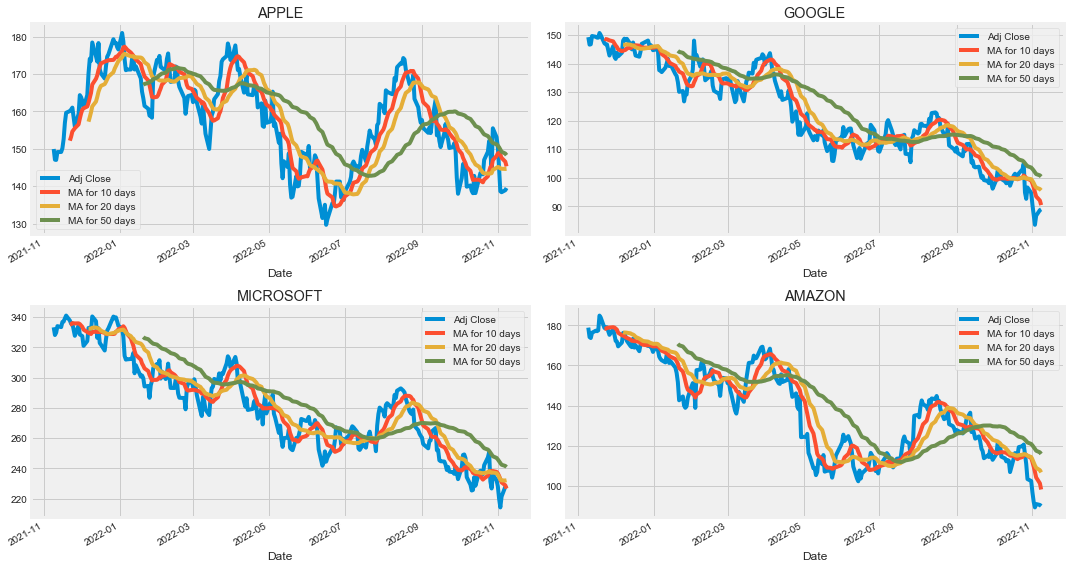

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

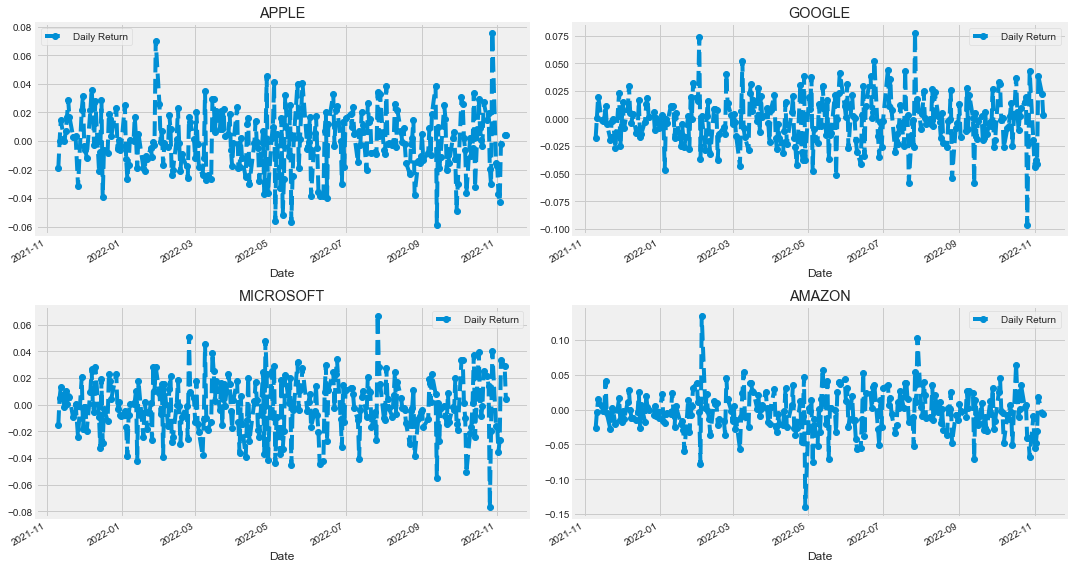

In [16]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()


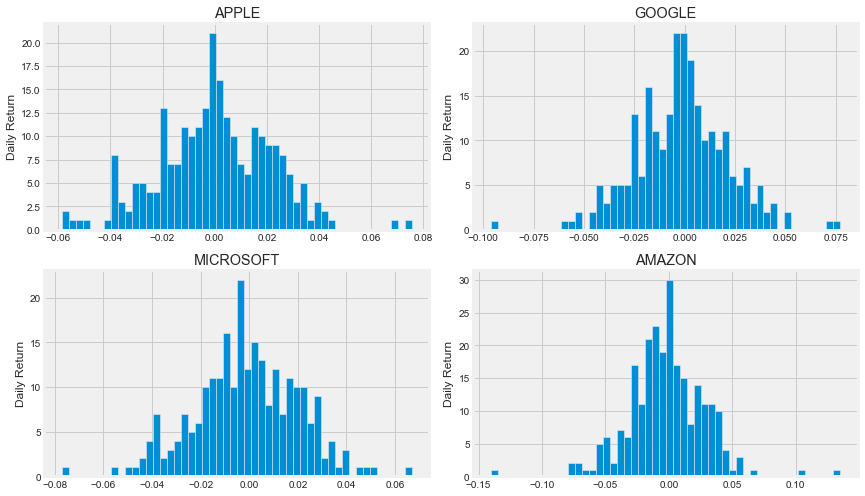

In [17]:
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [18]:
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.head() 

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-11-08,149.571915,149.351501,334.191101,174.449005
2021-11-09,149.939774,149.248505,333.159760,178.811493
2021-11-10,147.066437,146.626007,328.052521,174.102493
2021-11-11,147.016754,146.748001,329.669006,173.625000
2021-11-12,149.124542,149.645493,333.923401,176.257507


In [19]:
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-11-08,NaN,NaN,NaN,NaN
2021-11-09,0.002459,-0.000690,-0.003086,0.025007
2021-11-10,-0.019163,-0.017571,-0.015330,-0.026335
2021-11-11,-0.000338,0.000832,0.004928,-0.002743
2021-11-12,0.014337,0.019745,0.012905,0.015162


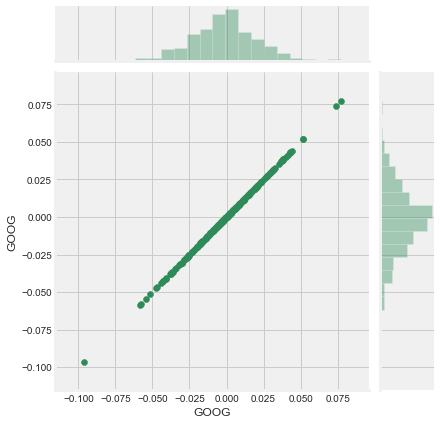

In [20]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

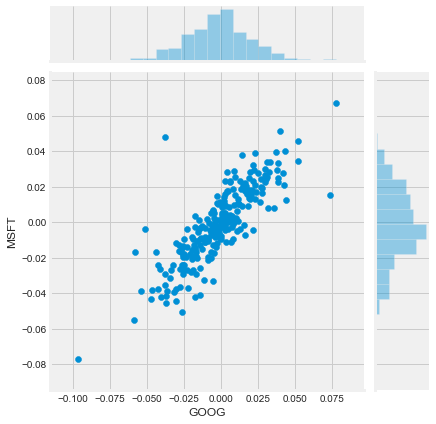

In [21]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')


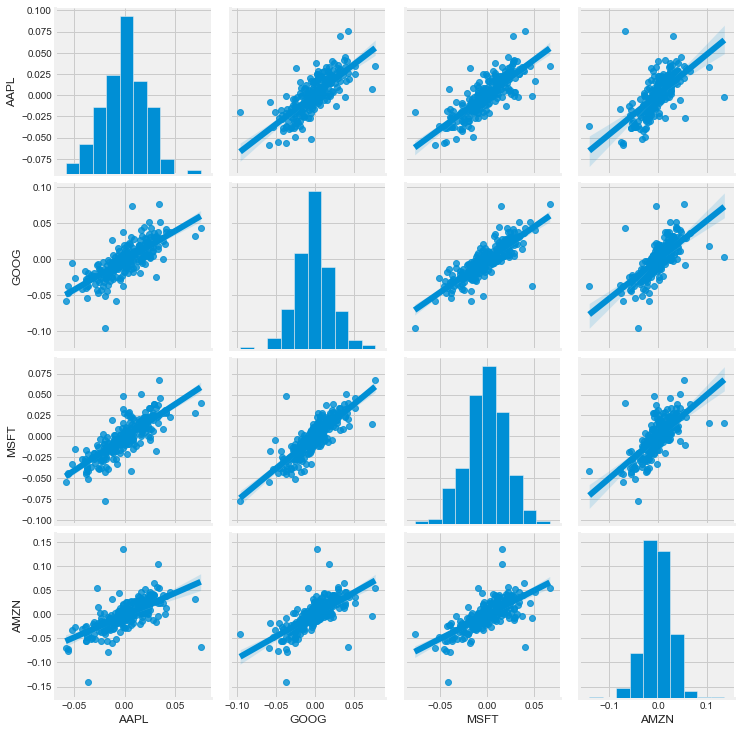

In [22]:
sns.pairplot(tech_rets, kind='reg')

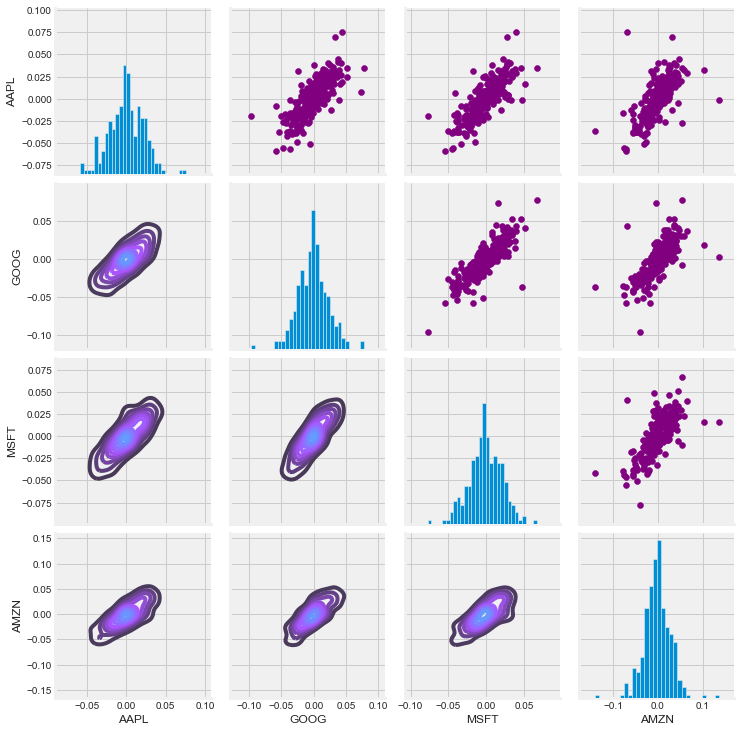

In [23]:
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

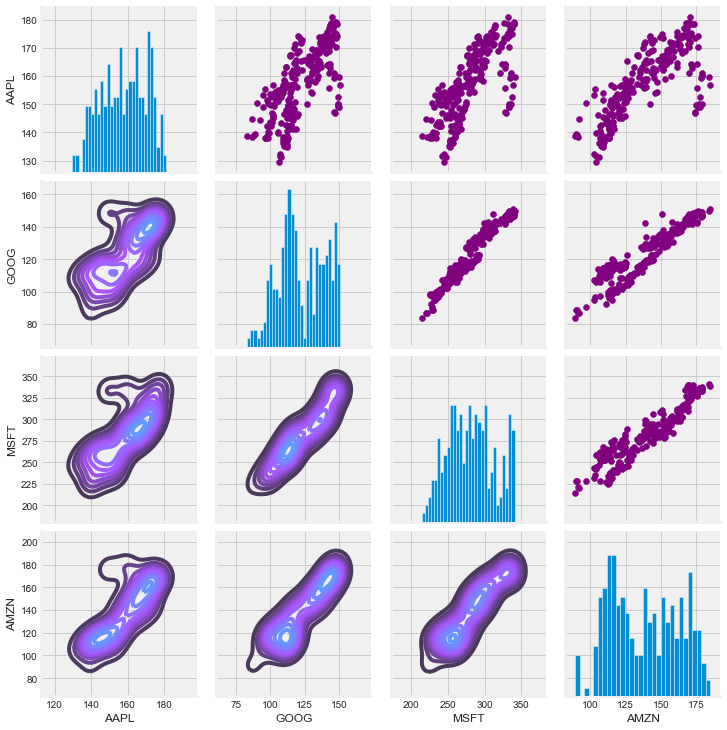

In [24]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

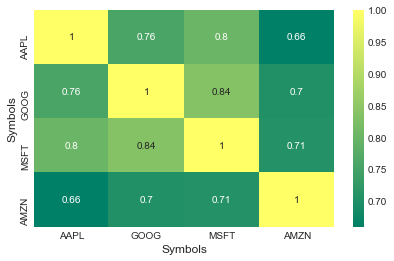

In [25]:
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

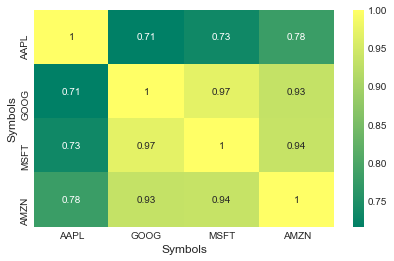

In [26]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')